In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [144]:
pd.set_option('display.max_rows' , None)
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_colWidth' , None)

In [145]:
df = pd.read_csv('Gurgaon_Properties_cleaned_V2.csv').drop_duplicates()

In [146]:
df.columns

Index(['Property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3677 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Property_type        3677 non-null   object 
 1   society              3676 non-null   object 
 2   sector               3677 non-null   object 
 3   price                3660 non-null   float64
 4   price_per_sqft       3660 non-null   float64
 5   area                 3660 non-null   float64
 6   areaWithType         3677 non-null   object 
 7   bedRoom              3677 non-null   int64  
 8   bathroom             3677 non-null   int64  
 9   balcony              3677 non-null   object 
 10  floorNum             3658 non-null   float64
 11  facing               2632 non-null   object 
 12  agePossession        3677 non-null   object 
 13  super_built_up_area  1875 non-null   float64
 14  built_up_area        1690 non-null   float64
 15  carpet_area          1872 non-null   float6

In [148]:
df.head(2)

,Property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 12,2.90,10740.0,2700.0,Plot area 2700(250.84 sq.m.),7,7,3,2.0,South-West,Old Property,NaN,2700.0,NaN,0,0,0,0,0,1,7
1,flat,umang winter hills,sector 77,0.86,6408.0,1342.0,Super Built up area 1342(124.68 sq.m.),2,2,2,16.0,NaN,New Property,1342.0,NaN,NaN,0,0,0,0,0,2,79


In [149]:
df.shape

(3677, 23)

In [150]:
df.duplicated().sum()

np.int64(0)

#price

<Axes: xlabel='price', ylabel='Density'>

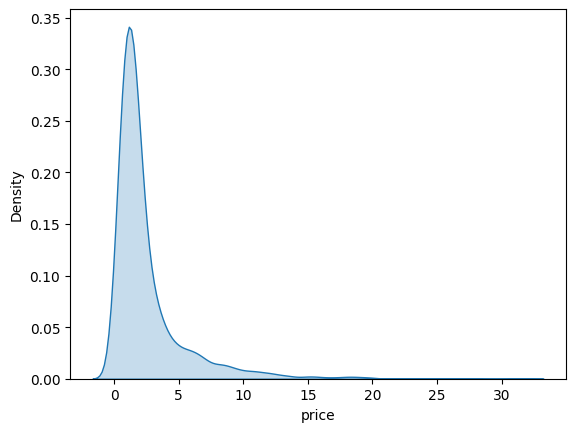

In [151]:
# Checking the distribution of price column
sns.kdeplot(df['price'] , fill=True)

<Axes: xlabel='price'>

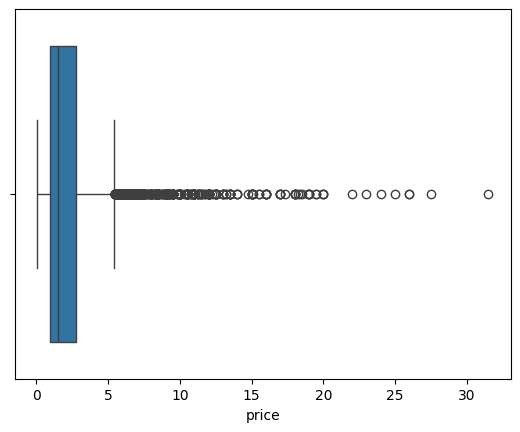

In [152]:
sns.boxplot(x = 'price' , data = df)

In [153]:
df['price'].describe()

,price
count,3660.000000
mean,2.533664
std,2.980623
min,0.070000
25%,0.950000
50%,1.520000
75%,2.750000
max,31.500000


In [154]:
# calculate the IQR value
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1

# define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# remove the outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers_no = outliers.shape[0]
outlier_price_stats = outliers['price'].describe()
outliers_no , outlier_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [155]:
outliers.sort_values('price' , ascending = False).head(20)

,Property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
293,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,0,74
1076,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,2,42
3732,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,2,138
2915,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 sq.yards (334.45 sq.m.)Carpet area: 350 sq.yards (292.64 sq.m.),16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,0,72
2996,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,1,0
2018,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,2,122
1938,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,2,145
1324,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,1,54
1795,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,2,31
680,house,independent,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,0,97


In [156]:
outliers.to_csv('Outliers.csv', index = False)

In [157]:
# on the basis of price col we can say that there are some genuine outliers but there some data error

##  **Price_per_sqft**

<Axes: xlabel='price_per_sqft', ylabel='Density'>

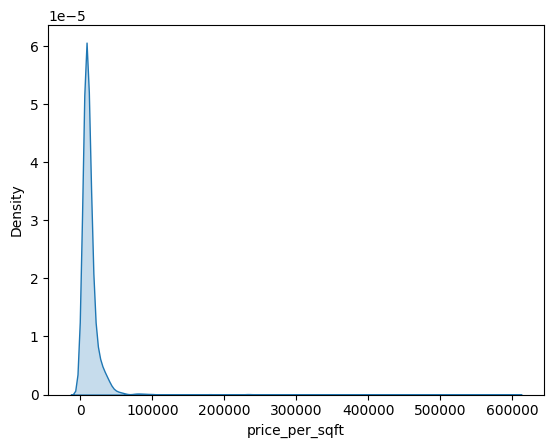

In [158]:
sns.kdeplot(df['price_per_sqft'] , fill = True)

<Axes: xlabel='price_per_sqft'>

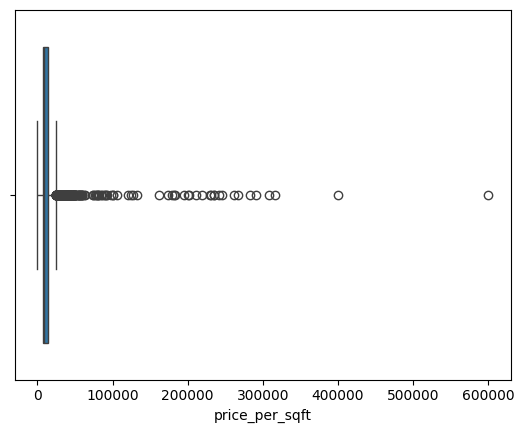

In [159]:
sns.boxplot(x = 'price_per_sqft', data = df)

In [160]:
# Calculate the IQR for the 'price_per_sqft' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [161]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

In [162]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

In [163]:
outliers_sqft['price_per_sqft'].describe()

,price_per_sqft
count,354.000000
mean,29357.906780
std,12403.077309
min,2723.000000
25%,25562.000000
50%,29870.500000
75%,35549.500000
max,82540.000000


In [164]:
df.update(outliers_sqft)

<Axes: xlabel='price_per_sqft', ylabel='Density'>

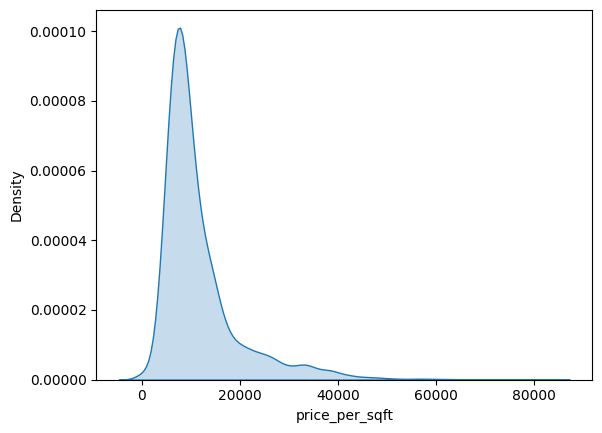

In [165]:
sns.kdeplot(df['price_per_sqft'] , fill = True)

<Axes: xlabel='price_per_sqft'>

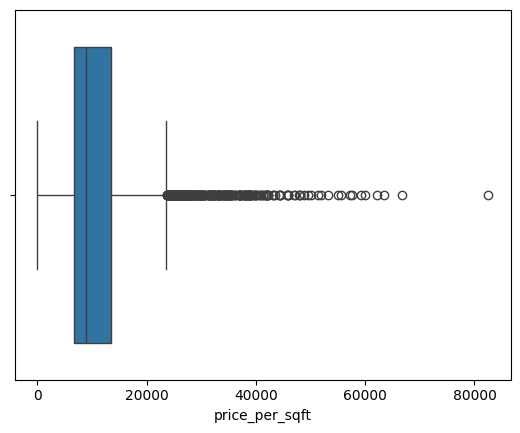

In [166]:
sns.boxplot(x = 'price_per_sqft', data = df)

In [167]:
df[df['price_per_sqft']>50000]

,Property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
653,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16,20,3+,4.0,East,New Property,NaN,2844.0,NaN,1,1,1,1,0,2,153
1066,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,4.0,North,New Property,NaN,1600.0,NaN,0,0,0,0,0,2,99
1118,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 sq.yards (271.74 sq.m.)Carpet area: 300 sq.yards (250.84 sq.m.),16,16,3+,4.0,West,New Property,NaN,325.0,300.0,1,1,1,1,0,0,72
1317,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3,3,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0,0,0,0,0,1,0
2018,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,2,122
2152,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3,3,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0,0,0,0,0,1,0
2234,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4,4,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1,1,0,1,0,0,75
2648,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 sq.yards (209.03 sq.m.)Carpet area: 200 sq.yards (167.23 sq.m.),4,4,3,2.0,North,Relatively New,NaN,250.0,200.0,1,1,1,1,0,2,103
2785,house,nul,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16,17,3+,4.0,South,Relatively New,NaN,2430.0,NaN,1,1,0,1,1,0,137
2915,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 sq.yards (334.45 sq.m.)Carpet area: 350 sq.yards (292.64 sq.m.),16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,0,72


In [168]:
# there are 13 rows which is not significant no if they are removed
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

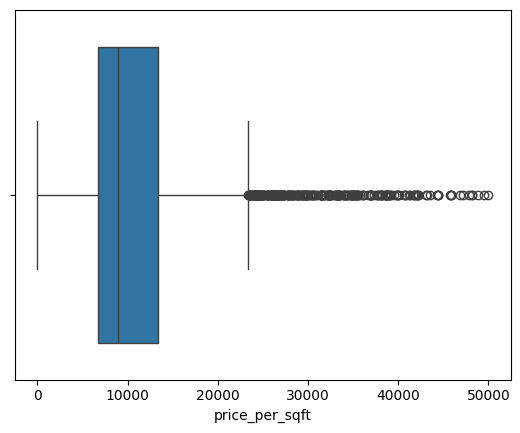

In [169]:
sns.boxplot(x=df['price_per_sqft'])

## **Area**

In [170]:
df.head(1)

,Property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 12,2.9,10740.0,2700.0,Plot area 2700(250.84 sq.m.),7,7,3,2.0,South-West,Old Property,NaN,2700.0,NaN,0,0,0,0,0,1,7


<Axes: xlabel='area', ylabel='Density'>

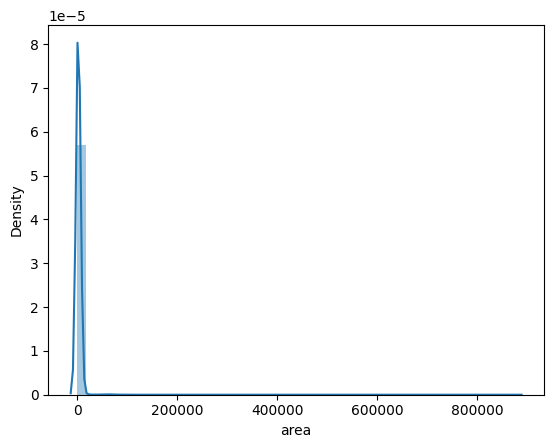

In [171]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

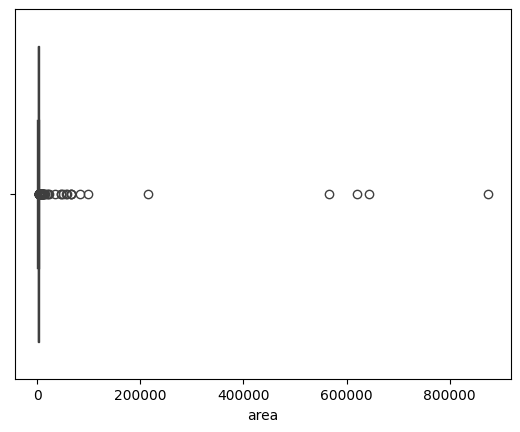

In [172]:
sns.boxplot(x = 'area' , data = df)

In [173]:
df['area'].describe()

,area
count,3647.000000
mean,2947.723608
std,23208.194102
min,145.000000
25%,1262.000000
50%,1750.000000
75%,2350.000000
max,875000.000000


In [174]:
df[df['area']>100000]

,Property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1127,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,1,44
1302,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,1,1,2,0
1355,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,1,65
1669,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,0,44
1822,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,1,76


In [175]:
df = df[df['area']<100000]

<Axes: xlabel='area', ylabel='Density'>

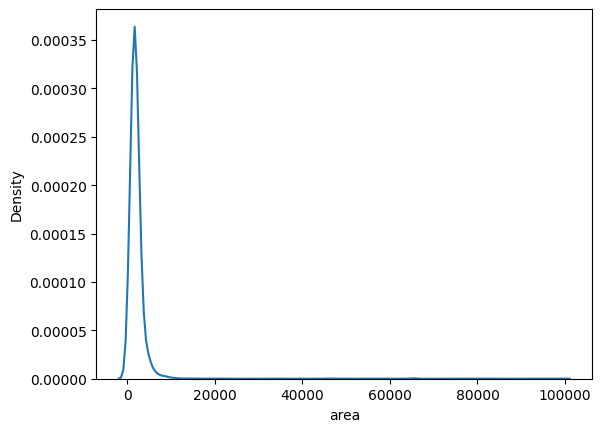

In [176]:
sns.kdeplot(df['area'])

<Axes: xlabel='area'>

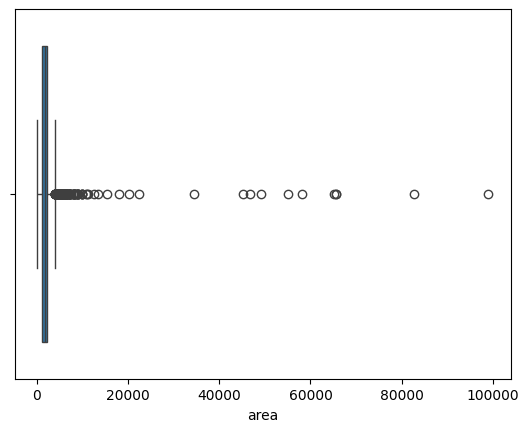

In [177]:
sns.boxplot(x = 'area' , data = df)

In [178]:
df[df['area']>10000]

,Property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
165,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,1,37
578,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,1,51
766,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.00,0,1,0,0,0,1,60
903,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160 sq.yards (1806.04 sq.m.)Carpet area: 1720 sq.yards (1438.14 sq.m.),3,3,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.00,0,1,0,0,0,1,160
926,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850 sq.yards (2382.96 sq.m.)Carpet area: 2250 sq.yards (1881.29 sq.m.),8,7,3+,3.0,East,Moderately Old,NaN,2850.0,2250.00,1,1,0,1,1,2,123
945,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,1,15
1076,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,2,42
1734,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,1,33
1824,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,1,37
1853,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800 sq.yards (4849.54 sq.m.)Carpet area: 5200 sq.yards (4347.86 sq.m.),9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,2,109


In [179]:
# 2459, 945 , 578 , 2206 , 165 , 1825 , 1734 , 3643 , 1471 are outliers
df.drop(index=[2459, 945 , 578 , 2206 , 165 , 1825 , 1734 , 3643 , 1471], inplace=True)

In [180]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,Property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1854,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,1,7
3400,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,1,0
1824,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,1,37
1853,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800 sq.yards (4849.54 sq.m.)Carpet area: 5200 sq.yards (4347.86 sq.m.),9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,2,109
2349,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 2660 sq.yards (2224.1 sq.m.)Carpet area: 2500 sq.yards (2090.32 sq.m.),9,9,3+,3.0,North-East,New Property,NaN,2660.0,2500.00,0,1,0,0,0,2,61
926,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850 sq.yards (2382.96 sq.m.)Carpet area: 2250 sq.yards (1881.29 sq.m.),8,7,3+,3.0,East,Moderately Old,NaN,2850.0,2250.00,1,1,0,1,1,2,123
3466,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,New Property,NaN,NaN,18122.00,1,0,0,1,1,2,44
903,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160 sq.yards (1806.04 sq.m.)Carpet area: 1720 sq.yards (1438.14 sq.m.),3,3,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.00,0,1,0,0,0,1,160
2223,house,independent,sector 4,0.85,630.0,13492.0,Plot area 1500(1254.19 sq.m.),3,3,1,1.0,North,Relatively New,NaN,13500.0,NaN,0,0,0,0,1,1,0
3441,flat,godrej icon,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,3,3,3+,6.0,NaN,New Property,NaN,NaN,1175.11,0,0,0,0,0,1,55


In [181]:
df.loc[1854,'area'] = 115*9
df.loc[3400,'area'] = 7250
df.loc[1853,'area'] = 5800
df.loc[2349,'area'] = 2660
df.loc[926,'area'] = 2850
df.loc[3466,'area'] = 1812
df.loc[903,'area'] = 2160
df.loc[3441,'area'] = 1175

(0.0, 12000.0)

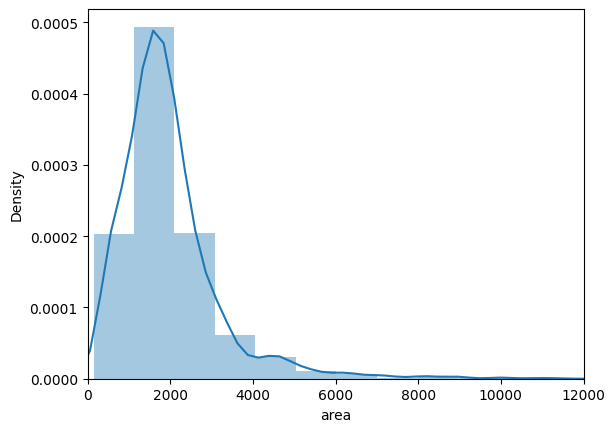

In [182]:
sns.distplot(df['area'])
plt.xlim(0, 12000)

(0.0, 10000.0)

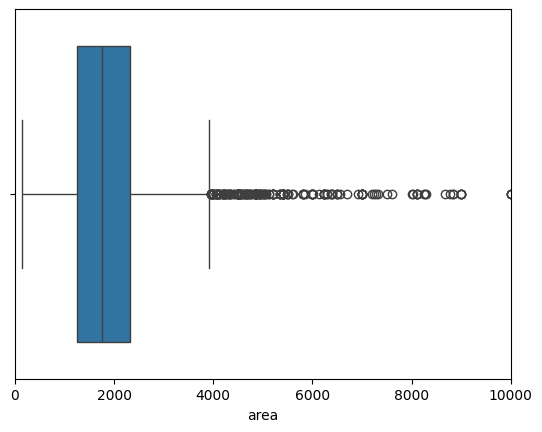

In [184]:
sns.boxplot(x = 'area' , data = df)
plt.xlim(0, 10000)

In [185]:
df['area'].describe()

,area
count,3633.000000
mean,1966.544178
std,1458.317834
min,145.000000
25%,1261.000000
50%,1749.000000
75%,2329.000000
max,49123.000000


## **Bedroom**


<Axes: xlabel='bedRoom', ylabel='Density'>

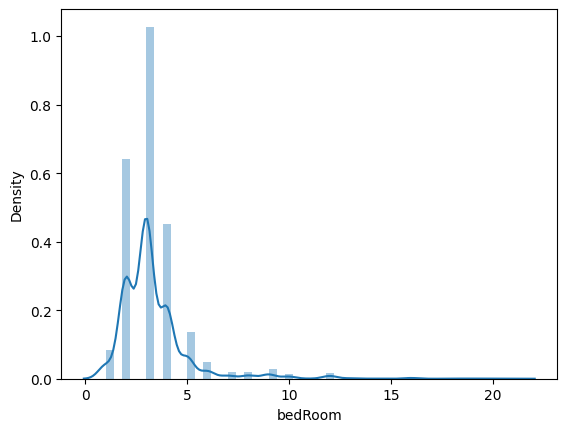

In [186]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

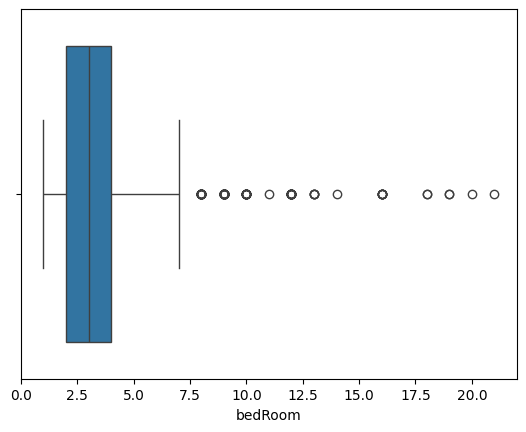

In [187]:
sns.boxplot(x=df['bedRoom'])

In [188]:
df['bedRoom'].describe()

,bedRoom
count,3633.000000
mean,3.333058
std,1.830285
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,21.000000


In [189]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,Property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
498,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0,1,0,0,0,0,49
840,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0,1,0,0,0,0,22
834,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 7500 sq.ft. (696.77 sq.m.),19,17,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1,0,1,0,0,1,68
2714,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 1622 sq.ft. (150.69 sq.m.),19,17,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1,1,1,1,0,1,74
1860,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18,18,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0,0,0,0,1,0,57
2869,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0,1,0,0,0,0,70
2656,house,independent,sector 56,12.39,45889.0,2700.0,Plot area 300(250.84 sq.m.),16,18,3+,4.0,North-East,New Property,NaN,2700.0,NaN,0,1,0,1,0,2,49
3114,house,dlf city plots,sector 26,20.00,44267.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,2,153
3299,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,3078.0,NaN,1,1,1,1,0,2,0
1462,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16,18,2,4.0,West,New Property,NaN,2700.0,NaN,0,1,0,1,0,2,49


In [190]:
df = df[df['bedRoom'] <= 10]

In [191]:
df.shape

(3588, 23)

<Axes: xlabel='bedRoom', ylabel='Density'>

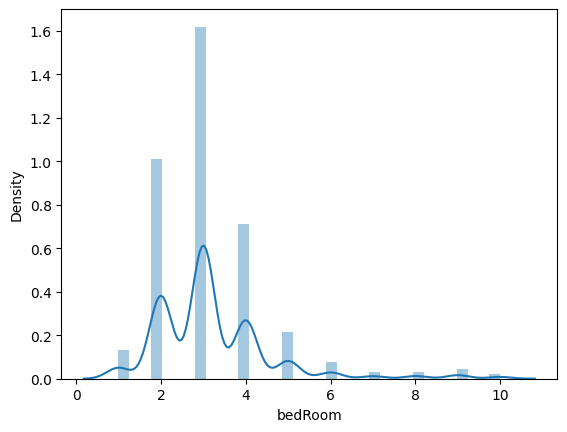

In [192]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

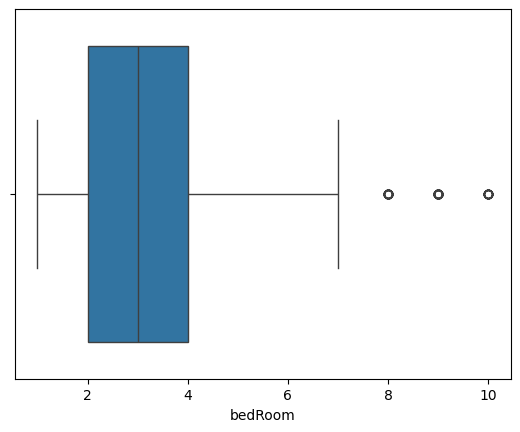

In [193]:
sns.boxplot(x=df['bedRoom'])

In [194]:
df['bedRoom'].describe()

,bedRoom
count,3588.000000
mean,3.203177
std,1.394250
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,10.000000


## **Bathroom**

<Axes: xlabel='bathroom', ylabel='Density'>

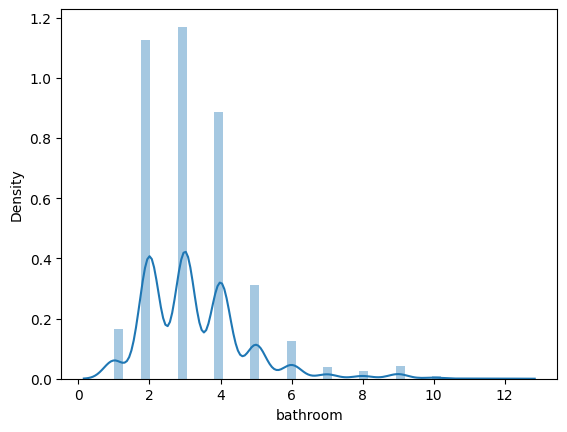

In [195]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

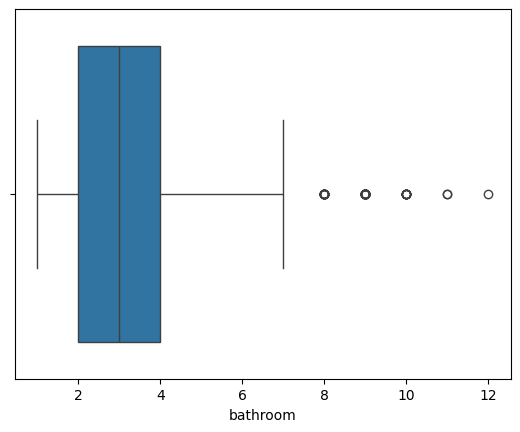

In [196]:
sns.boxplot(x=df['bathroom'])

In [197]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,Property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3554,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0,1,0,0,0,2,146
1147,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: 5000 sq.ft. (464.52 sq.m.),8,11,3+,3.0,East,Old Property,NaN,5000.0,NaN,1,1,0,1,1,2,39
3111,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 sq.ft. (650.32 sq.m.),10,11,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0,0,0,1,0,0,38


In [198]:
df.head()

,Property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 12,2.90,10740.0,2700.0,Plot area 2700(250.84 sq.m.),7,7,3,2.0,South-West,Old Property,NaN,2700.0,NaN,0,0,0,0,0,1,7
1,flat,umang winter hills,sector 77,0.86,6408.0,1342.0,Super Built up area 1342(124.68 sq.m.),2,2,2,16.0,NaN,New Property,1342.0,NaN,NaN,0,0,0,0,0,2,79
2,flat,ambience creacions,sector 22,2.55,13709.0,1860.0,Super Built up area 1860(172.8 sq.m.)Built Up area: 1600 sq.ft. (148.64 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),3,3,3,8.0,North-East,Relatively New,1860.0,1600.0,1400.0,0,0,0,0,1,0,125
4,house,suncity essel towers,sector 28,8.95,17900.0,5000.0,Plot area 5000(464.52 sq.m.),5,6,3+,4.0,NaN,Moderately Old,NaN,5000.0,NaN,0,0,0,0,0,1,0
5,flat,godrej summit,sector 104,0.98,5950.0,1647.0,Super Built up area 1647(153.01 sq.m.),3,3,3,12.0,East,Relatively New,1647.0,NaN,NaN,0,0,0,0,1,1,79


## **super built up area**

<Axes: xlabel='super_built_up_area', ylabel='Density'>

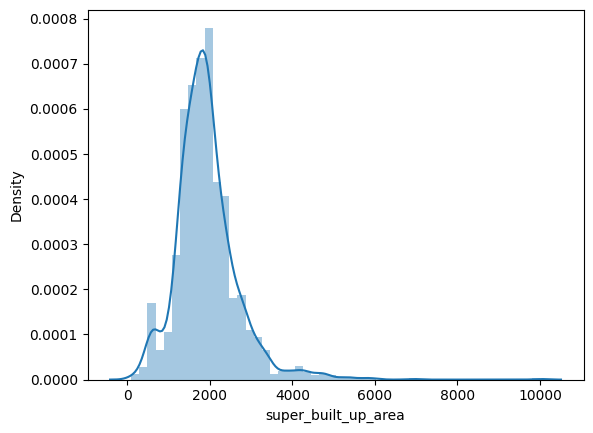

In [199]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

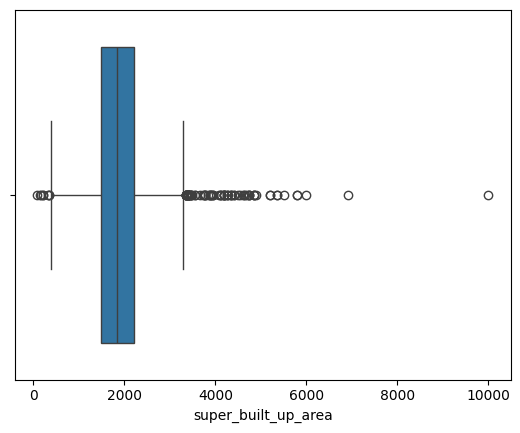

In [200]:
sns.boxplot(x=df['super_built_up_area'])

In [201]:
df['super_built_up_area'].describe()

,super_built_up_area
count,1875.000000
mean,1925.237627
std,764.172177
min,89.000000
25%,1479.500000
50%,1828.000000
75%,2215.000000
max,10000.000000


In [202]:
df[df['super_built_up_area'] > 6000]

,Property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1591,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0,1,0,1,1,1,49
2834,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,1,0,0,0,2,140


# **built up area**

<Axes: xlabel='built_up_area', ylabel='Density'>

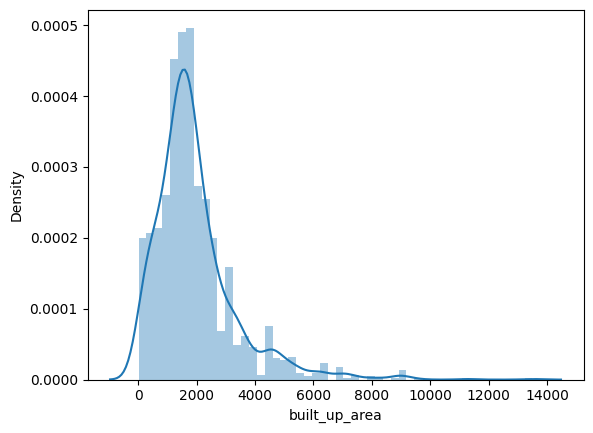

In [203]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

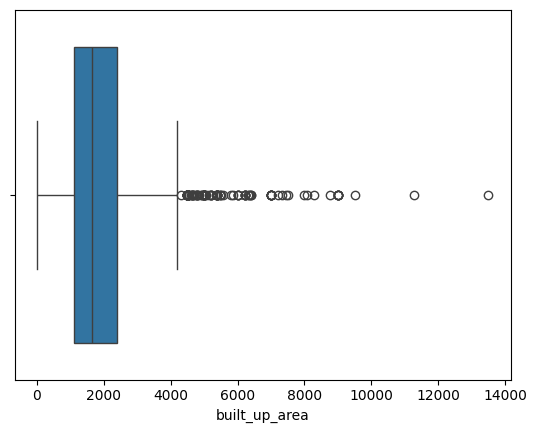

In [204]:
sns.boxplot(x=df['built_up_area'])

In [205]:
df[df['built_up_area'] > 10000]

,Property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1076,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,2,42
2223,house,independent,sector 4,0.85,630.0,13492.0,Plot area 1500(1254.19 sq.m.),3,3,1,1.0,North,Relatively New,NaN,13500.0,NaN,0,0,0,0,1,1,0


# **carpet area**

<Axes: xlabel='carpet_area', ylabel='Density'>

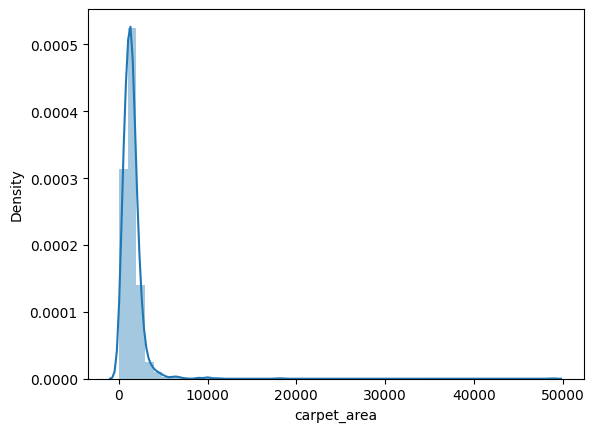

In [206]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

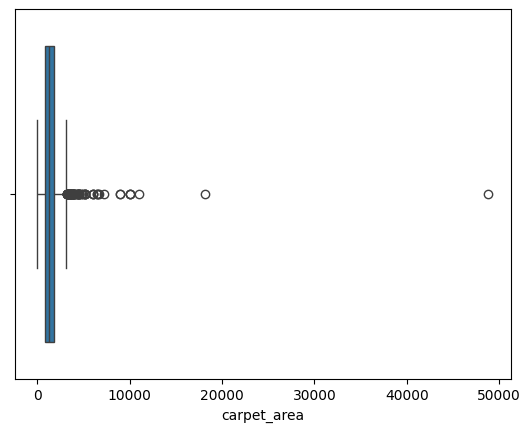

In [207]:
sns.boxplot(x=df['carpet_area'])

In [208]:
df[df['carpet_area'] > 10000]

,Property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
766,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,1,60
1824,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.0,1,0,0,0,0,1,37
3466,flat,godrej air,sector 85,2.50,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,New Property,NaN,NaN,18122.0,1,0,0,1,1,2,44


In [209]:
df.loc[3466,'carpet_area'] = 1812

In [210]:
df[df['carpet_area'] > 10000]

,Property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
766,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,1,60
1824,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.0,1,0,0,0,0,1,37


In [211]:
df.head()

,Property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 12,2.90,10740.0,2700.0,Plot area 2700(250.84 sq.m.),7,7,3,2.0,South-West,Old Property,NaN,2700.0,NaN,0,0,0,0,0,1,7
1,flat,umang winter hills,sector 77,0.86,6408.0,1342.0,Super Built up area 1342(124.68 sq.m.),2,2,2,16.0,NaN,New Property,1342.0,NaN,NaN,0,0,0,0,0,2,79
2,flat,ambience creacions,sector 22,2.55,13709.0,1860.0,Super Built up area 1860(172.8 sq.m.)Built Up area: 1600 sq.ft. (148.64 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),3,3,3,8.0,North-East,Relatively New,1860.0,1600.0,1400.0,0,0,0,0,1,0,125
4,house,suncity essel towers,sector 28,8.95,17900.0,5000.0,Plot area 5000(464.52 sq.m.),5,6,3+,4.0,NaN,Moderately Old,NaN,5000.0,NaN,0,0,0,0,0,1,0
5,flat,godrej summit,sector 104,0.98,5950.0,1647.0,Super Built up area 1647(153.01 sq.m.),3,3,3,12.0,East,Relatively New,1647.0,NaN,NaN,0,0,0,0,1,1,79


# luxury score

<Axes: ylabel='luxury_score'>

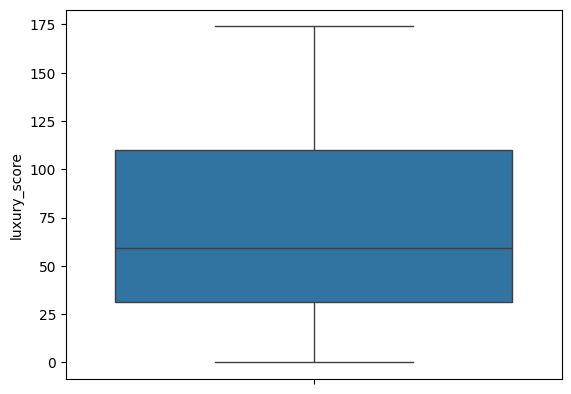

In [213]:
sns.boxplot(df['luxury_score'])

<Axes: xlabel='luxury_score', ylabel='Density'>

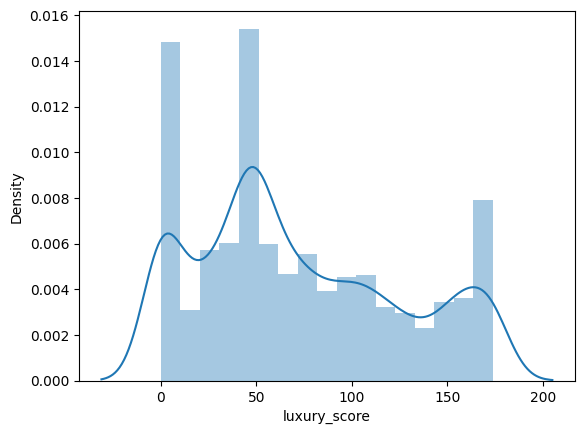

In [214]:
sns.distplot(df['luxury_score'])

In [215]:
df.shape

(3588, 23)

In [216]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [217]:
df.head()

,Property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 12,2.90,10741.0,2700.0,Plot area 2700(250.84 sq.m.),7,7,3,2.0,South-West,Old Property,NaN,2700.0,NaN,0,0,0,0,0,1,7
1,flat,umang winter hills,sector 77,0.86,6408.0,1342.0,Super Built up area 1342(124.68 sq.m.),2,2,2,16.0,NaN,New Property,1342.0,NaN,NaN,0,0,0,0,0,2,79
2,flat,ambience creacions,sector 22,2.55,13710.0,1860.0,Super Built up area 1860(172.8 sq.m.)Built Up area: 1600 sq.ft. (148.64 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),3,3,3,8.0,North-East,Relatively New,1860.0,1600.0,1400.0,0,0,0,0,1,0,125
4,house,suncity essel towers,sector 28,8.95,17900.0,5000.0,Plot area 5000(464.52 sq.m.),5,6,3+,4.0,NaN,Moderately Old,NaN,5000.0,NaN,0,0,0,0,0,1,0
5,flat,godrej summit,sector 104,0.98,5950.0,1647.0,Super Built up area 1647(153.01 sq.m.),3,3,3,12.0,East,Relatively New,1647.0,NaN,NaN,0,0,0,0,1,1,79


<Axes: xlabel='price_per_sqft', ylabel='Density'>

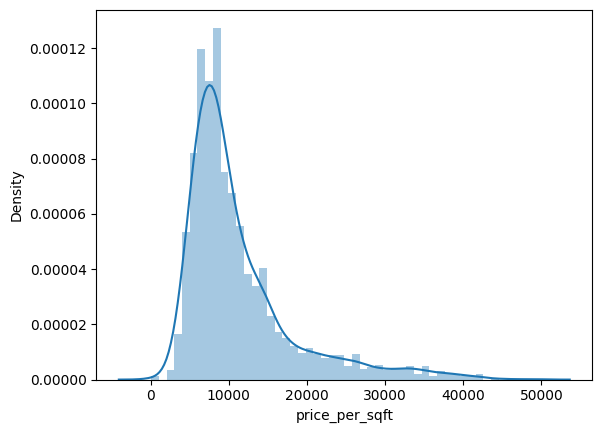

In [218]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

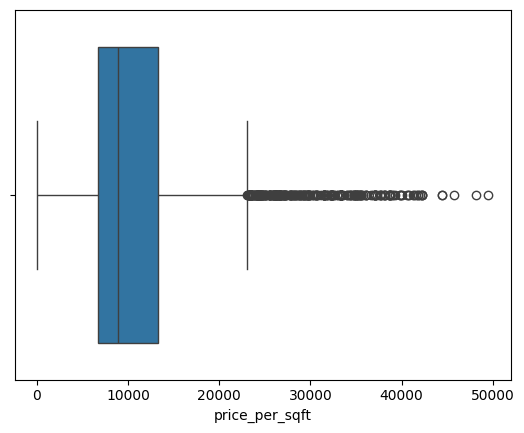

In [220]:
sns.boxplot(x = df['price_per_sqft'])

In [221]:
df[df['price_per_sqft'] > 42000]

,Property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
644,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6,8,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1,1,1,1,0,0,0
680,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,0,97
1035,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 sq.yards (96.15 sq.m.)Carpet area: 100 sq.yards (83.61 sq.m.),9,9,3+,5.0,East,New Property,NaN,115.0,100.0,0,0,0,0,1,2,44
1861,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4,5,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0,1,1,1,0,2,60
1922,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3,3,3+,4.0,North,New Property,NaN,2700.0,NaN,0,0,0,1,0,2,7
2412,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6,8,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1,1,1,1,0,2,103
2494,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.),2,2,2,3.0,North,Undefined,NaN,2000.0,1800.0,0,0,0,0,0,1,0
2765,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 sq.yards (250.84 sq.m.)Carpet area: 250 sq.yards (209.03 sq.m.),5,5,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0,1,0,1,0,2,88
3742,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6,6,3,2.0,East,Relatively New,NaN,4518.0,NaN,1,1,0,0,0,2,121


In [224]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

np.float64(250.5)

In [226]:
df[(df['area']/df['bedRoom'])<250].shape

(185, 23)

In [230]:
df['arearoom_ratio'] = df['area']/df['bedRoom']

In [231]:
df[df['arearoom_ratio']<250]['bedRoom'].value_counts()

,count
bedRoom,
2,47
3,33
5,28
6,17
4,17
9,15
8,12
7,8
10,8


In [232]:
df = df[df['arearoom_ratio']>100]

In [235]:
outlier_df = df[(df['arearoom_ratio']<250) & (df['bedRoom']>3)]

In [236]:
outlier_df['bedRoom'] = round(outlier_df['bedRoom']/outlier_df['floorNum'])

In [237]:
df.update(outlier_df)

In [238]:
df['arearoom_ratio'] = df['area']/df['bedRoom']

In [240]:
df[(df['arearoom_ratio']<250) & (df['bedRoom']>4)]

,Property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,arearoom_ratio
124,house,independent,sector 3 phase 2,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5,3,3,1.0,NaN,Undefined,NaN,NaN,900.0,0,0,0,0,0,1,0,180.000000
622,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10,1,0,1.0,NaN,New Property,NaN,2250.0,NaN,0,0,0,0,0,1,0,225.000000
892,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5,4,2,1.0,North-East,Undefined,NaN,NaN,110.0,0,0,0,0,0,1,0,198.000000
1198,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5,1,0,1.0,NaN,Undefined,NaN,565.0,NaN,0,0,0,0,0,1,0,113.000000
1806,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6,2,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0,0,0,0,0,1,0,166.666667
2139,house,independent,manesar,0.80,6667.0,1200.0,Plot area 1200(111.48 sq.m.),8,8,2,1.0,NaN,Relatively New,NaN,1200.0,NaN,0,0,0,0,0,1,0,150.000000
2865,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6,4,1,1.0,South-West,Undefined,NaN,NaN,900.0,0,0,0,0,0,1,0,150.000000
2901,house,"bhim nagar, sector 6",sector 6,0.85,14096.0,603.0,Plot area 67(6.22 sq.m.),5,2,2,1.0,NaN,Old Property,NaN,67.0,NaN,0,0,0,1,0,1,29,120.600000
2970,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9,4,3,1.0,South,Undefined,NaN,NaN,120.0,0,0,0,0,0,1,0,120.000000
3434,house,independent,sector 3 phase 2,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area: 900 sq.ft. (83.61 sq.m.),5,4,2,1.0,East,Undefined,NaN,1100.0,900.0,0,0,0,0,0,1,0,220.000000


In [241]:
df[(df['arearoom_ratio']<250) & (df['bedRoom']>4)].shape

(13, 24)

In [242]:
df = df[~((df['arearoom_ratio']<250) & (df['bedRoom']>4))]

In [243]:
df.shape

(3555, 24)

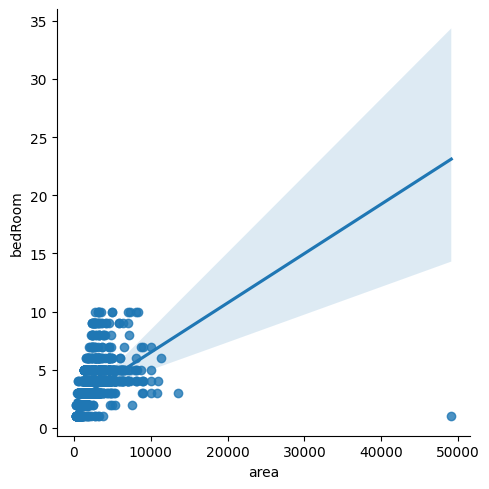

In [244]:
sns.lmplot(x = 'area' , y = 'bedRoom' , data = df)

In [245]:
df.to_csv('Gurgaon_Properties_Outlier_cleaned_data.csv', index = False)